# Data cleaning and preprocessing

### Róbert Móro, Jakub Ševcech

IAU, 30.10.2019

## You can leave feedback here: https://tinyurl.com/iau2019-w06

## You can ask questions at http://slido.com#iau2019-w06

# Agenda

## An example of questions on topics from previous week

## Short example of data cleaning

## Basic data cleaning tasks

1. ### Missing values

2.  ### Outliers

3.  ### Data normalization

4. ### Data type transformation

> #### Numerical attributes to categorical

> ####  Categorical attributes to numerical

# An example of questions on topics from previous week

Which of these statements is truthful?

* If the p-value is lower than the accepted probability of type 1 error, then we reject null hypothesis. 
* The null hypothesis in t-test states, that the mean value of tested distributions is different. 
* If we obtain p-value > 0,05 in the t-test, we have proved the null hypothesis.

# Why data cleaning?
## Real world data are generally
* Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
* Noisy: containing errors or outliers
* Inconsistent: containing discrepancies in codes or names

## Tasks in data preprocessing
* Data cleaning: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies. **(today)**
* Data integration: using multiple databases, data cubes, or files. **(two weeks ago)**
* Data transformation: normalization and aggregation. **(today)**
* Data reduction: reducing the volume but producing the same or similar analytical results. **(next time)**
* Data discretization: part of data reduction, replacing numerical attributes with nominal ones. **(today)**
> sometimes, we need to go the other way nominal => numerical

(source: [http://www.cs.ccsu.edu/~markov/ccsu_courses/DataMining-3.html](http://www.cs.ccsu.edu/~markov/ccsu_courses/DataMining-3.html))

We recommend using package `scikit-learn` for preprocessing. You can find options it supports here: http://scikit-learn.org/stable/modules/preprocessing.html

Exhaustive list of other tasks you can do to preprocess data and for feature engineering can be found here: http://www.datasciencecentral.com/profiles/blogs/feature-engineering-data-scientist-s-secret-sauce-1

Well covered preprocessing and data cleaning is here (although examples are in R): https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf Most interesting part is the section about missing values and outliers.

Well written text about expectations for cleaned data [here](https://github.com/jtleek/datasharing)

# Example of cleaning of a small dataset 

Data cleaning is heavily explorative and iterative task. You never know what you'll find.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['font.family'] = 'DejaVu Sans' # This line here is only to set nice font. If it fails here, just comment it out. This line can cause even some failures when plotting data.
from IPython.display import Image

We have our well known dataset of flowers Iris, but it is a little messed up. Let's look at it and let's try to correct it.

In [5]:
iris_data = pd.read_csv('../data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


We can see there are some missing values.

In [7]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see some basic statistics, but nothing suspicious so far. We can see missing values again, but we already knew that.

C:\Users\sevo_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sevo_\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\sevo_\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sevo_\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\sevo_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

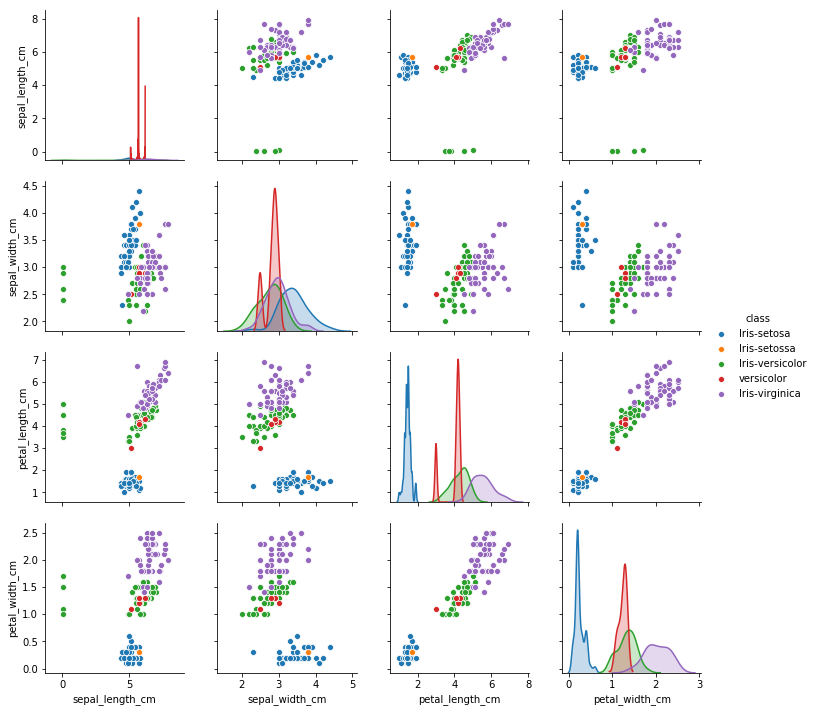

In [8]:
seaborn.pairplot(iris_data, hue='class')

We got a lot of warning due to missing values. For our convenience, we will drop them for now.

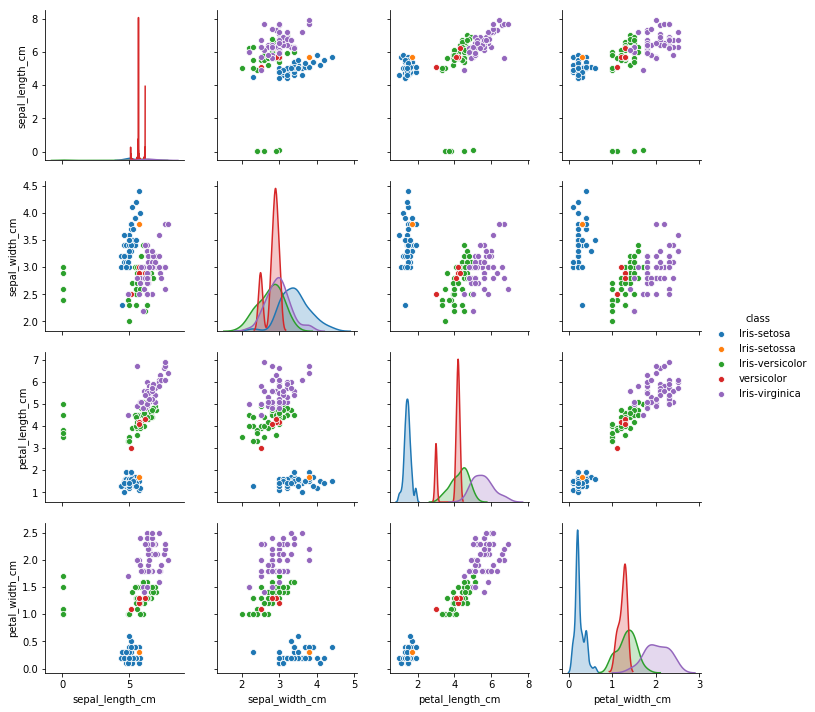

In [9]:
seaborn.pairplot(iris_data.dropna(), hue='class')

Now, we are starting to see some strange things. From what we know about the data, we should have 3 classes. It appears there are some typos in class names.

In [10]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

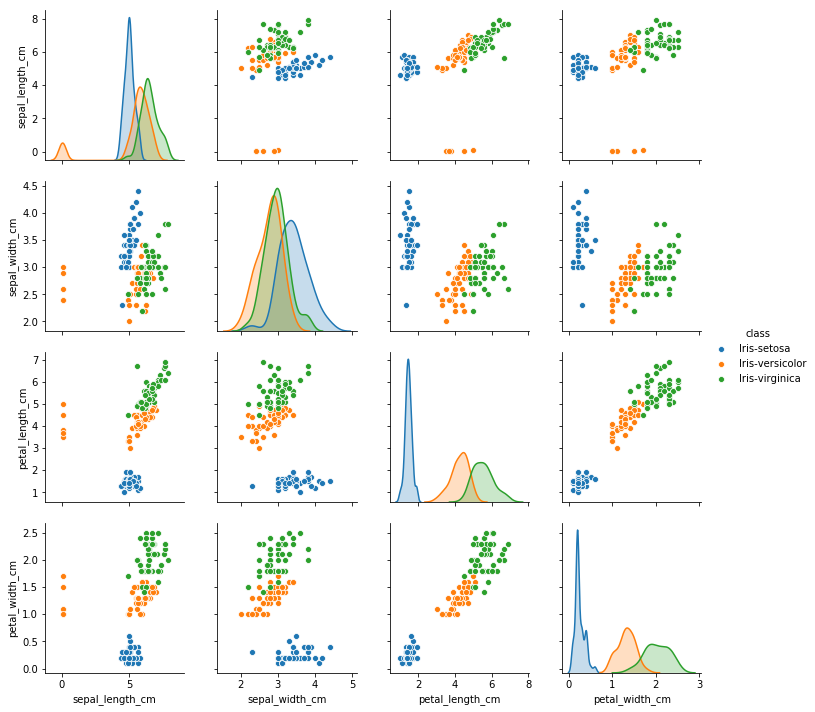

In [11]:
seaborn.pairplot(iris_data.dropna(), hue='class')

Next, we can see some isolated values in *sepal_length_cm* attribute for Iris-versicolor class

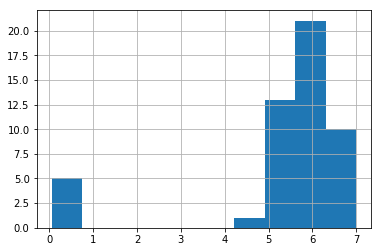

In [12]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

They are quite far even in histogram

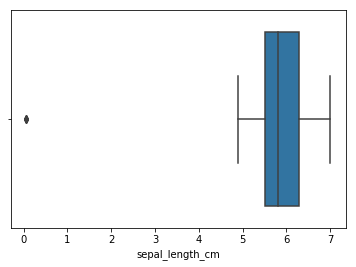

In [13]:
seaborn.boxplot(iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'])

Boxplot suggests that they could be outliers.

What to do with them? Any suggestions?

Let's get a closer look at them first

In [14]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 ), 'sepal_length_cm']

77    0.067
78    0.060
79    0.057
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64

In [15]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] > 1 ), 'sepal_length_cm']

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length_cm, dtype: float64

It appears that somebody entered length in meters instead of centimeters by mistake. 

In [16]:
mask = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 )

iris_data.loc[mask, 'sepal_length_cm'] = iris_data.loc[mask, 'sepal_length_cm'] * 100

In [17]:
iris_data.loc[mask, 'sepal_length_cm']

77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
Name: sepal_length_cm, dtype: float64

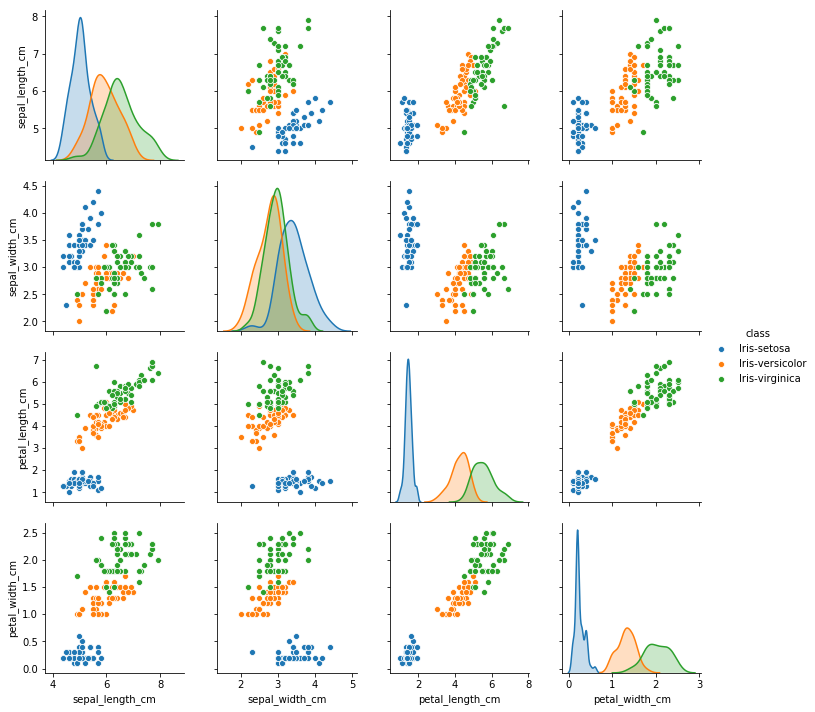

In [18]:
seaborn.pairplot(iris_data.dropna(), hue='class')

## Let's look at the missing values

In [19]:
iris_data[iris_data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


All are values of one attribute from one class.

How are these values supposed to look like?

What existing values look like?

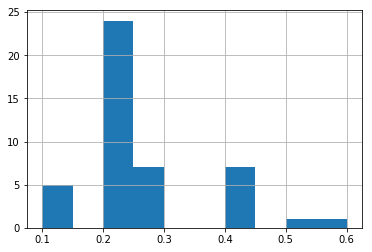

In [20]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

They seems to stick around one central value. We can try to replace missing value by mean or maybe median.

In [21]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
average_petal_width

0.25111111111111106

In [22]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

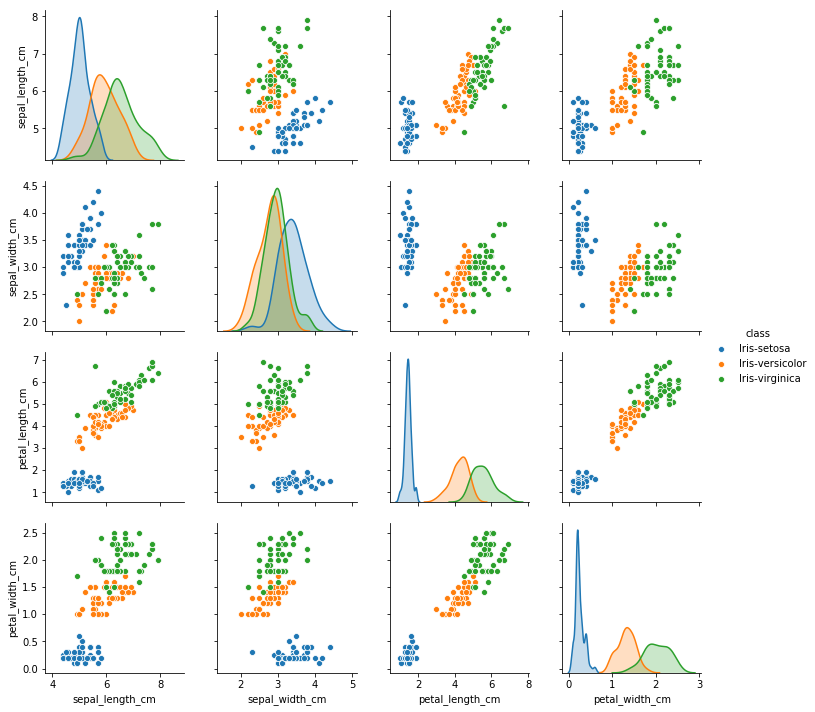

In [23]:
seaborn.pairplot(iris_data, hue='class')

The previous data correction is written in a nasty way on purpose. To make you see what happens in the background. There is more elegant way. Imputer object.

In [24]:
from sklearn.preprocessing import Imputer

So I will load the data again.

In [25]:
iris_data_cpy = pd.read_csv('../data/iris-data.csv')
nan_map = iris_data_cpy.isnull().any(axis=1)
iris_data_cpy[nan_map]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


And replace the missing values

In [26]:
imp = Imputer(missing_values='NaN', strategy='mean')
 
iris_data_cpy['petal_width_cm'] = imp.fit_transform(iris_data_cpy[['petal_width_cm']])
iris_data_cpy[nan_map]

C:\Users\sevo_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,1.236552,Iris-setosa
8,4.4,2.9,1.4,1.236552,Iris-setosa
9,4.9,3.1,1.5,1.236552,Iris-setosa
10,5.4,3.7,1.5,1.236552,Iris-setosa
11,4.8,3.4,1.6,1.236552,Iris-setosa


In [27]:
# What are other missing values replacement strategies?
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputer(*args, **kwargs)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)

The fit_transform method trains the value to replace with first and then it uses it in the transformation.

There are separate methods fit and transform. 
They are very important when working with separate train and test sets. You can **never** run fit nor fit_transform on test data. Always transform only. **The transformation is always trained on train data and only applied on test data.**

# Missing values

To be able to do something about missing values, we have to know the process of their creation. We can know this either from the data, from asking about the way they were collected or by deeper understanding of the process of dataset creation.

1. Missing Completely at Random (MCAR)
> The process of missing values creation does not depend on measured attributes or attributes not measured. There is no systematic bias.
2. Missing at Random (MAR)
> The process of missing values creation depends on measured attributes.
3. Missing Not at Random (MNAR)
> None of the previous. The process depends on attributes not collected in the dataset. 

The list is in the order of increasing severity.

(More info: [https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87))

# Let's have an example on data about income of some population. 
## 1. Missing Completely at Random (MCAR)
> The process of missing values creation does not depend on measured attributes or attributes not measured.

Some random questionnaires were lost or corrupted. 


## 2. Missing at Random (MAR)
> The process of missing values creation depends on measured attributes.

* Example 1: One of the volunteers collecting data lost / thrown away / got stolen / got eaten by his dog ... some random part of the questionnaires. **In the data, we store the volunteer id**
* Example 2: **We collect also the information about the person employment.** People working at for example managerial positions have higher probability to not disclose their salary.

The process of missing value creation is random inside a subgroup (specific volunteer, one group of the population). 

# Survivorship bias

<img src="img/Survivorship-bias.png" alt="Survivorship bias" style="width: 500px; margin-left: auto; margin-right: auto;"/>

[https://en.wikipedia.org/wiki/Survivorship_bias](https://en.wikipedia.org/wiki/Survivorship_bias)

## 3. Missing Not at Random (MNAR)
> The process depends on attributes not collected in the dataset.

* People earning less than 600 euro per month are more often afraid to confess their salary.
* In the location where we collect the data, we have an unbalanced sample of the population. We collect the data in a small village during the working time and we meet mostly elderly or unemployed people vs. we collect the data in front of a big IT company where salaries are high. 

The process of missing value formation is not random. It depends on the missing value itself or other value not collected. 
**Attention** we are getting a systematic bias in the data. Often, we have no way to know about it. When we find out, we have to try to correct. Often, we have to collect the data from scratch.

# Correcting missing values

We can correct only MCAR and MAR.

In the case of MNAR, generally we can do nothing after the data collection process is over. We can't tell how severely is the systematic error manifested in the data and can not find it out afterwards as the value that we would need is precisely the one that is missing. 

# Strategies for missing values replacement

A lot of strategies. These are among the most often used ones. Replacement by:

* median (numerical data)
* mean (numerical data)
* most frequent value (discrete data)
* previous methods on a subgroup / segment defined by a correlated attribute (MAR)
* k-nearest neighbor algorithm (KNN) - finding similar observations using known attributes and replacement of the missing value by an aggregated value of this attribute from similar observations
* classification model where the dependent variable is the attribute containing missing value and training data are other observations and attributes which are known. (discrete data)
* the same as previous only using regression model (numerical data)
* other more advanced methods based on statistical modeling of the data (Expectation Maximization, Matrix Factorization, SVD, ...)

The simple ones are implemented directly in scikit-learn (sklearn.preprocessing.Imputer) or are easy to implement

Multiple more advanced are in library [fancyinpute](https://pypi.org/project/fancyimpute/)

If nothing helps, then deletion. This is the last resort.

# Attention!! 

When replacing missing values it is very important to train transformation on train data and not on test data.

For example library Fancyinpute has a problem with this in several methods.

Two classes of implementations:
* Transductive 
> Is able only to train and transform at the same time. After starting at the test data, training is started over. Not usable in production on data never seen before. This is often not problem of the method itself, but the implementation only. Theoretically, it could be done in a inductive way, only the implementation does not allow it. This is for example the case of KNN in Fancyinpute. See [documentation](https://pypi.org/project/fancyimpute/)
* Inductive 
> Is trained on train data and after training is applicable on train or test data.
> THis is the approach we want to use in our project. Imputer in scikit-learn, some simpler methods in Fancyinpute, your own implementations if programmed correctlyinto separate fit and transform methods.



## Let's try to create simple inductive missing values replacement tool

In [28]:
data = np.random.randn(10)
data[2:5] = np.nan
data

array([ 1.34147508,  1.7097536 ,         nan,         nan,         nan,
       -0.74903137,  0.70340973,  1.82564732,  0.14585242,  0.11516847])

In [29]:
from sklearn.base import TransformerMixin

class MyImputer(TransformerMixin):
    
    def __init__(self, missing_value=np.nan):
        self.missing_value = missing_value
        self.mean = 0
        
    def _get_mask(self, X, value_to_mask):
        if np.isnan(value_to_mask):
            return np.isnan(X)
        else:
            return np.equal(X, value_to_mask)
        
    
    def fit(self, X, y=None):        
        mask = self._get_mask(X, self.missing_value)
        self.mean = np.mean(X[~mask])
        return self
        
    
    def transform(self, X):
        mask = self._get_mask(X, self.missing_value)
        X[mask] = self.mean
        
        return X
        

In [30]:
imp = MyImputer()
imp.fit(data)
new_data = imp.transform(data)
new_data    

array([ 1.34147508,  1.7097536 ,  0.72746789,  0.72746789,  0.72746789,
       -0.74903137,  0.70340973,  1.82564732,  0.14585242,  0.11516847])

In [31]:
imp.mean

0.7274678921776342

In [32]:
data = np.random.randn(10)
data[2:5] = np.nan

imp = MyImputer()
new_data = imp.fit_transform(data)
new_data  

array([-1.34826752,  0.7694763 , -0.18532493, -0.18532493, -0.18532493,
        0.49329182, -0.74024291, -0.28020009, -0.53006561,  0.33873354])

fit_transform is in fact only fit and transform combined

![you dont say](https://pics.me.me/you-dont-say-memes-com-14014390.png)

# Outliers

We can use multiple strategies for outlier treatment:

* removal
* replacement using boundary values of the distribution (5 percentile, resp. 95 percentile)
* transformation of the attribute with outliers using a chosen function (logarithm, root, and so on)
> this is not so much a method to solve outlier problem as method to make sure these observations are really outliers 

## Attention

When deciding what is and what is not an outlier, you have to consider the distribution of the attribute. Outlier detection using boxplot is useful on distributions close to Normal distribution. If the attribute has different distribution, you have to normalize.

# Data normalization

This is data from one competition. It contains attributes about network connections. It is not as important right now what attributes this data describe as what is their shape.

In [33]:
data_file = "../data/x_train.csv"
challenge_data = pd.read_csv(data_file, nrows=1000, sep=',', header=None)
challenge_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,-1.278341,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-3.672226,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-5.564399,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,3.240573,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,-0.639724,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027


In [34]:
challenge_data.info() # all attributes are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

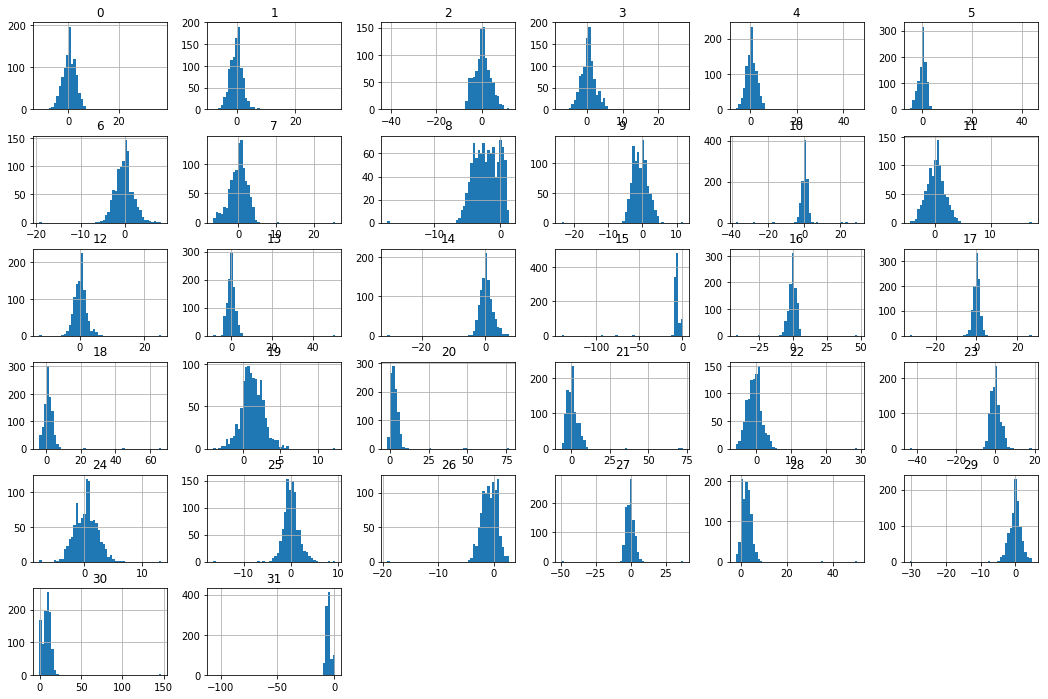

In [35]:
# seaborn.pairplot(netcla) # This is not a good idea. There is too many attributes. Every pair form a huge matrix
# plt.rcParams['figure.figsize'] = 18, 12
_ = challenge_data.hist(figsize=(18, 12), bins=50)

Some attributes appear to have shape similar to Normal distribution. Others not so much. Such as attribute with index 20.

Skewness:  11.204489382533838


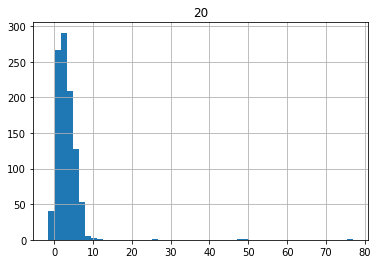

In [36]:
index = 20
pom = challenge_data[index].hist(bins=50)
pom.set_title(index)

import scipy.stats as stats
print('Skewness: ', stats.skew(challenge_data[index]))

Skewness value is very high which means the distribution is not symmetrical, but is skewed to the left (towards lower values). Thus there is a lot of low values and less and less of extremely high values.

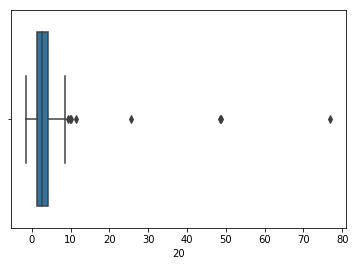

In [37]:
seaborn.boxplot(challenge_data[index])

Boxplot suggests that we have some outliers in the high values. 

Let's compute the value for boxplot's whiskers. Every observations outside these values were marked as potential outliers.

In [38]:
descr = challenge_data[index].describe()
whisker_r = descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))
whisker_r

descr = challenge_data[index].describe()
whisker_r = np.min([descr['max'], descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))])
whisker_l = np.max([descr['min'], descr['25%'] - (1.5 * (descr['75%'] - descr['25%']))])
whisker_l, whisker_r

(-1.5215626955032349, 8.652123291027412)

The left whisker is in fact equal to the minimum value.

In [39]:
challenge_data[20].min()

-1.5215626955032349

How many observations were marked as outliers?

In [40]:
sum(challenge_data[20] > whisker_r)

8

As the left whisker is equal to minimum, there are no outliers in low values.

### Boxplot is not very good when dealing with asymmetrical data.
Let's try to transform the data so they will be more symmetrical.

We will use logarithm.

We have to pay attention as logarithm can't process negative numbers.

Skewness: -0.09981990185102008


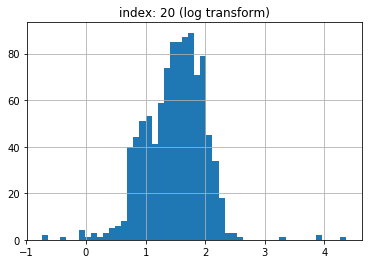

In [41]:
index = 20
transformed = np.log(challenge_data[index]+2) #shift all values so we have no negative values (adding 2 should be more than enough)
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (log transform)" % index)
print("Skewness:", stats.skew(transformed))

After the transformation, skewness value is much closer to 0 which means the distribution is much more symmetrical.

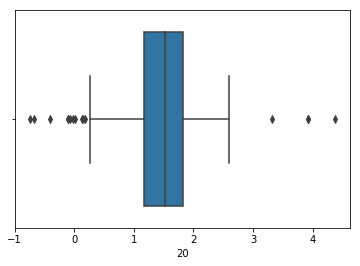

In [42]:
seaborn.boxplot(transformed)

Let's compute whisker values again

In [43]:
descr2 = (transformed).describe()
whisker2_r = np.min([descr2['max'], descr2['75%'] + (1.5 * (descr2['75%'] - descr2['25%']))])
whisker2_l = np.max([descr2['min'], descr2['25%'] - (1.5 * (descr2['75%'] - descr2['25%']))])
whisker2_l, whisker2_r

(0.20404823864545207, 2.798869737021752)

How many outliers do we have now?

In [44]:
sum(transformed > whisker2_r)

4

In [45]:
sum(transformed < whisker2_l)

11

When we transform the data in a way to be closer to Normal distribution (at least to a distribution centered over a single central value), then box plot finds completely different set of outliers. In the original distribution we didn't have to notice some observations with low values (close to 0) as too much of the weight of the distribution was shifted towards lower values.

When using boxplot, make sure distribution is centered around one central value. Attention to asymmetrical distributions.

Often used transformation is Box-Cox. It is very similar to logarithm. Only, you don't have to select the base for logarithm but it is trained to fit the data. More info here: http://onlinestatbook.com/2/transformations/box-cox.html

In [46]:
from scipy.stats import boxcox

0.031902697078064354


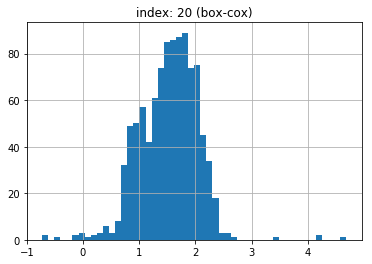

In [47]:
index = 20
transformed, att = boxcox(challenge_data[index]+2)# BoxCox return transformed data and transformation parameters. These second I can fix in the function call and then it returns only the transformed data
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (box-cox)" % index)
print(att)

This returned parameter is very important. You have to store it and use it as the second parameter of the function call when transforming test data. In that case, the transformation will not train the parameter, but only use the provided one. Thus it will return only transformed data without the parameter.

## Other normalizations
There is a whole group of normalizations based on multiplying all values by a common number and subtraction of another number.

* z-normalization
> mean value is 0 and standard distribution  1 shift = mean, scale = std
* 0-1 normalization: shift = min, scale =  max - min
> all values will be in the interval <0-1>. Attantion on the fact, that minimum and maximum are very unstable measures. It could easily happen, that in test data there will be a lower value thanminimum and higher value than maximum. You can't retrain the transformation on new data. As a result, you will have some values outside the <0-1> interval
* the same thing as 0-1 normalization is done by StandardScaler object in sklearnfor all attributes in the dataset at the same time. Pay attention to asymmetrical distributions. 
* if you use RobustScaler, you will be able to deal with outliers (it uses interval defined by 1st quartile (25th quantile) and the 3rd quartile (75th quantile)). It is more stable, but values ouside 0-1 are common.


In [48]:
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

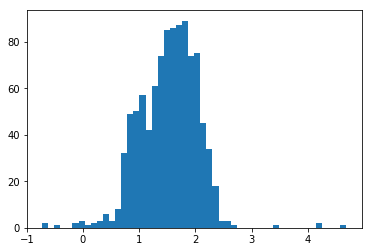

In [49]:
_ = plt.hist(transformed, bins=50)

Text(0.5, 1.0, 'throughput (Z-normalization)')

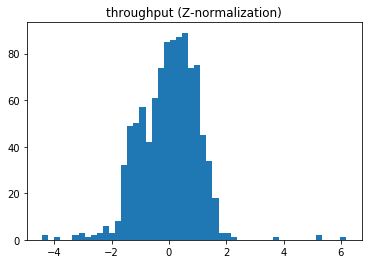

In [50]:
z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
_ = plt.hist(z_transformed, bins=50)
plt.title('throughput (Z-normalization)')

The mean value and standard deviation changed

Sklearn has implemented z-normalization

Text(0.5, 1.0, 'throughput (Z-normalization)')

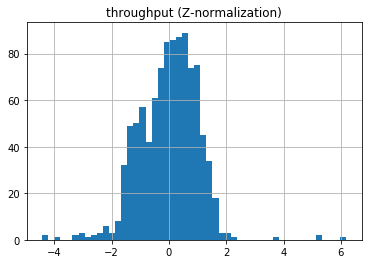

In [51]:
# sklearn.preprocessing
preprocessing.scale(transformed)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

# For what else except outlier detection can be used normalization?

A lot of algorithms performs various mathematical operations with data. When working with extreme values, problems may occur. 

For example neural network would need to have very high or very low weights on edges between neurons to work with such values. It would need a lot of data to train such weights. With distributions skewed to one side not even more data would help. Those extreme values are occurring to rarely and other values will overshadow them. A better way is to preprocess the data.

A similar case are also weights of attributes in linear regression. If an extreme value occurs, the result of the prediction would very quickly grow into extremes. 


# Transformation of numerical attributes to categorical - diskretization

For some algorithms numerical values are not directly applicable. For example Naive Bayes is one such algorithm. It requires categorical data. These can be created by dividing numerical values into intervals.

Interval boarders are either manually set, or such that the width of intervals was equivalent (Equal width binning/discretization), or such that number or items in intervals was equal (Equal frequency binning/discretization).


## Equal width binning

In [52]:
bin_count = 10
bins = np.linspace(z_transformed.min(), z_transformed.max(), bin_count)
bins # these are interval boarders. Intervals have equal width

array([-4.42671654, -3.24692043, -2.06712432, -0.88732821,  0.29246791,
        1.47226402,  2.65206013,  3.83185624,  5.01165235,  6.19144847])

In [53]:
z_transformed[:10] # small sample of the original data

array([ 0.10657099,  0.16580308,  0.8440961 , -1.24717423,  0.48185395,
       -0.55594854,  0.3699829 , -0.04235558, -1.22058166, -0.61991132])

In [54]:
ew_digitized = np.digitize(z_transformed, bins)
ew_digitized[:10] # sample of data transformed into identified bins

array([4, 4, 5, 3, 5, 4, 5, 4, 3, 4], dtype=int64)

<BarContainer object of 9 artists>

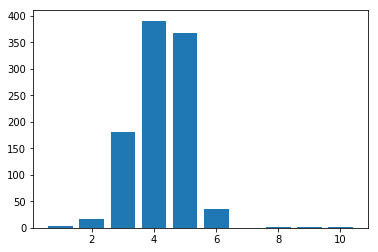

In [55]:
plt.bar(*np.unique(ew_digitized, return_counts=True))

Intervals are of the same width, but the number of observations per bin is variable. The shape of the distribution is maintained. 

Notice, that we are no longer using histogram to display the data but bar plot.


When creating intervals with equal width, I have divided the interval between minimal and maximal values evenly. Nothing stops me from defining custom intervals with variable width and make it into the approach using manually defined intervals. 

Intervals with variable width are often used for example to sort people into age groups: 0-15 children, 15-18 teenagers, 18-25 young adult, 25-60 adults, 60+ seniors


## Equal frequency binning

We want intervals to have approximately equal number of observations.


In [56]:
data = challenge_data[20] # wee don't need to normalize the data but if we would, it would not hurt

bin_count = 10
percentiles = np.linspace(0, 100, bin_count, endpoint = False)
percentiles # we want to create intervals such that every one contains 10% of the data. These are boarders of frequencies / intervals of percentiles

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [57]:
bins = list(map(lambda x: np.percentile(data, x), percentiles))
bins # this transforms percentile boarders into interval boarders

[-1.5215626955032349,
 0.3481952660537032,
 0.878680005317,
 1.5704484939575194,
 2.106584409165542,
 2.592609643936157,
 3.1949773599911797,
 3.8665801048278805,
 4.695518307476256,
 5.678778468091513]

In [58]:
ef_digitized = np.digitize(data, bins)
ef_digitized[:10] # this transforms values into interval identifiers

array([6, 6, 8, 2, 7, 3, 7, 5, 2, 3], dtype=int64)

<BarContainer object of 10 artists>

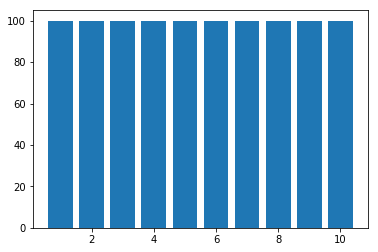

In [59]:
plt.bar(*np.unique(ef_digitized, return_counts=True))

Every interval contains equal number of observations.

### What will happen when we transform test data?

<BarContainer object of 11 artists>

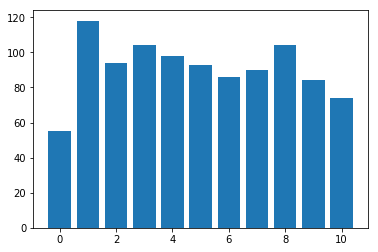

In [61]:
challenge_data_test = pd.read_csv("../data/x_test.csv", nrows=1000, sep=',', header=None)
test_data = challenge_data_test[20]

# I will not change the bin boarders. I will use the transformation trained on train data. It is necessary to pay attention to this. I can never change transformation parameters between train and test data 
ef_digitized_test = np.digitize(test_data, bins)
plt.bar(*np.unique(ef_digitized_test, return_counts=True))

Now, number of observations per bin is no longer equal. This is caused by small differences between train and test data.

# Transformation of numerical data to binary

This is very simple. We need only a threshold and everything below will be 0 and above will be 1.


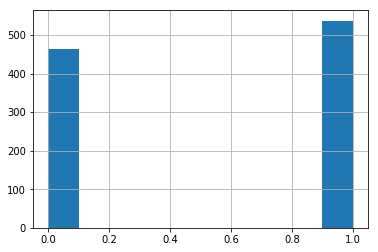

In [62]:
binarizer = preprocessing.Binarizer(0) # in thsi case, the threshold is 0
binary = binarizer.transform(z_transformed.reshape(1, -1))
pd.Series(binary[0]).hist()

# Transformation of categorical data to numerical

http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/

https://github.com/wdm0006/categorical_encoding

https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/

### There are many approaches to transform categorical data into numbers

1. Ordinal - Assigning numbers in increasing order to various values
2. One-hot - From every unique categorical value z we create a new column. The value in the columns is 1 if the original row contained value thiscolumn was created from. All other columns will contain 0.
3. Binary - We will take ordinal representation, change it into binary form of the number and create a column for every digit.
4. Sum - The mean of dependent variable from rows of one subgroup (defined by the categorical variable) of observations is compared with the mean of dependent variable of all observations.
5. Helmert - Very similar to Sum, only the uniqueness of categorical value is given by different combination of values
6. BackwardDifferenceEncoder - Very similar to Sum, only the uniqueness of categorical value is given by different combination of values
7. Polynomial - Will train coefficients of polynomial regression of variable degree which can be used to predict dependent variable (I think it is questionable for small number of unique categorical values) (requires ordinal attribute)
8. Hash - Uses a hash function on the string of the categorical value and applies modulo by number of unique categorical values. Available in sklearn http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html
9. Recently methods creating embeddings are very popular. A representation created by training a neural network.

For now, we are interested only in first 4, numbers 7 and 9. The rest are only variations of these and only change distribution of values.

In [63]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# pip install category_encoders
import category_encoders as ce

# encoder = ce.OrdinalEncoder()
# encoder = ce.BinaryEncoder()
# encoder = ce.PolynomialEncoder() 
# encoder = ce.HashingEncoder()

# encoder = ce.HelmertEncoder()
encoder = ce.OneHotEncoder() # this one is also in sklearn.preprocessing.OneHotEncoder, however these have the same definition/structure
# encoder = ce.BackwardDifferenceEncoder()
# encoder = ce.SumEncoder()

In [67]:
# we will remove missing values
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived'])
titanic_y = titanic.dropna().reindex(columns=['Survived'])

In [68]:
# We will encode categorical data
encoder.fit(titanic_X, titanic_X.Fare)
titanic_categorical = encoder.transform(titanic_X)
titanic_categorical.head()

,PassengerId,Pclass,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,...,Cabin_127,Cabin_128,Cabin_129,Cabin_130,Cabin_131,Cabin_132,Cabin_133,Embarked_1,Embarked_2,Embarked_3
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,7,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,11,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,12,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


This is not exactly what we would expect. We have to pay attention on how many unique values can be found in the categorical attribute. In this example we tried to encode a name which has too many different values and thus we created too many new columns. In general, this is not a good idea.

# What to take from this lecture?


1. The process of missing data correction depends on the process of their formation. Sometimes, it is not even possible.

2. There are a lot of strategies to replace missing values. Removal of the instance should be only the last resort.

3. When detecting outliers, various visualization methods give you only suggestions on what is an outlier. Always think about it first and check the data distribution.

4. Data normalization can help not only when detecting outliers, but also in the model training.

5. When replacing outliers, use similar methods as when replacing missing values.

6. How to transform data between various forms.

7. What problems can be caused by transformation of categorical attribute by assignment of numbers from 0 to the number of unique values.?

## You can leave feedback here: https://tinyurl.com/iau2019-w06